In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

In [134]:
filename='20180415_2.csv' # input file name

with open('/cygdrive/c/Users/mike/Documents/FORScan/'+filename, 'r') as file:
  infile = file.read()
infile = infile.replace("-","")
with open('./'+filename, 'w') as file:
  file.write(infile)

import_df = pd.read_csv('./'+filename,dtype={"time(ms)": int})
import_df = import_df.set_index('time(ms)')

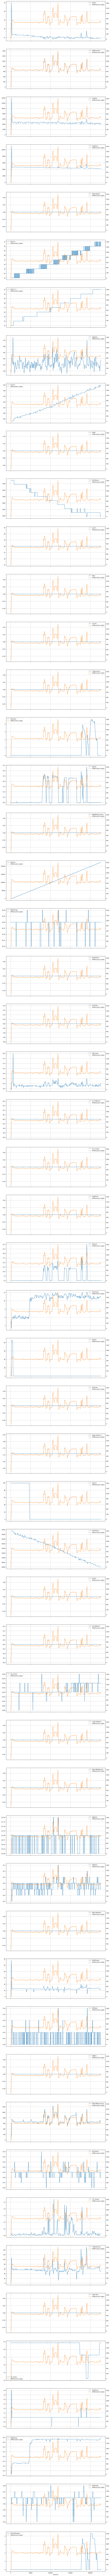

In [230]:
x=0
fig, axes = plt.subplots(nrows=len(import_df.select_dtypes(include=['float64']).columns),figsize=(15,400))
fig.patch.set_facecolor('white')
for l in list(import_df.select_dtypes(include=['float64']).columns):
        import_df[l].plot(ax=axes[x],grid=True,legend=True)
        import_df['RPM(rev/min)'].plot(ax=axes[x],grid=True,legend=True,secondary_y=True)
        x+=1

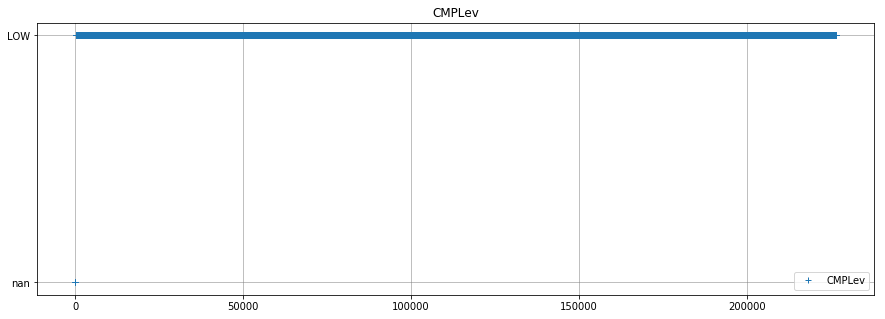

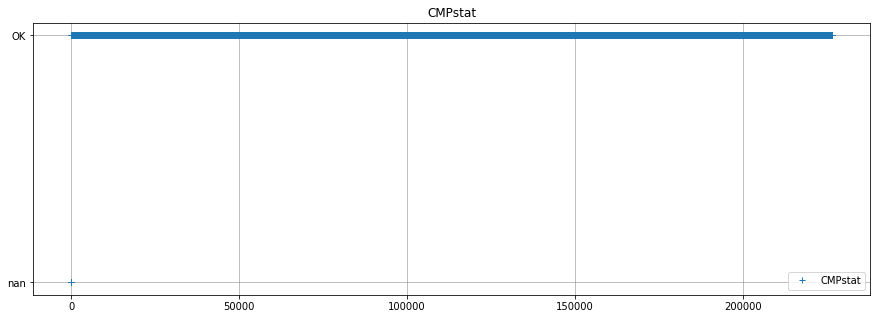

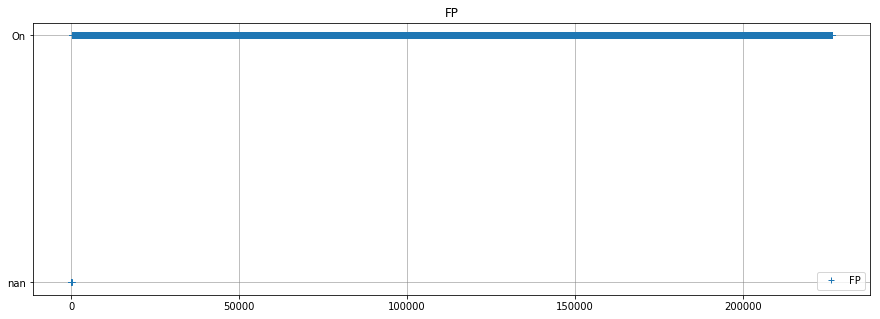

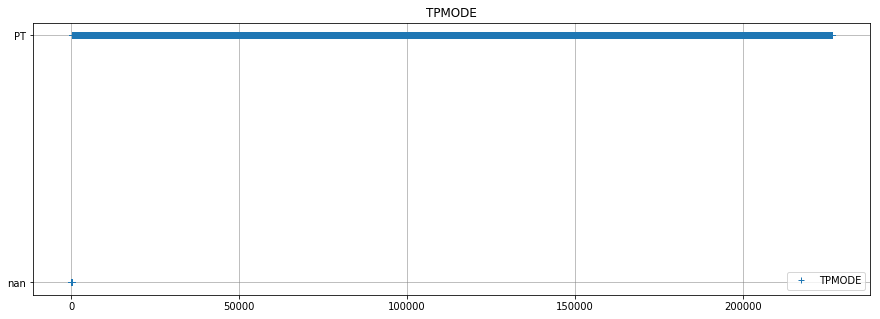

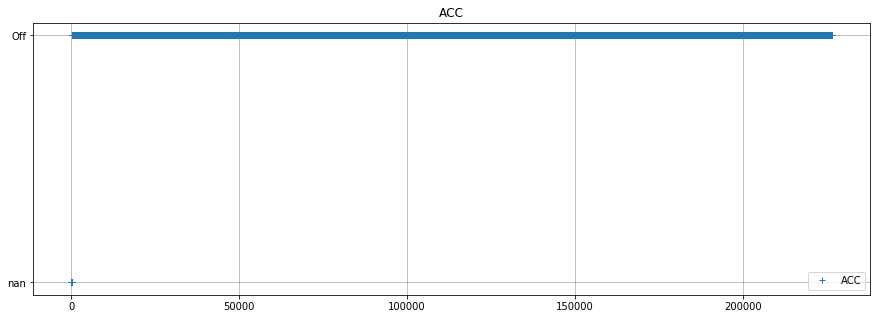

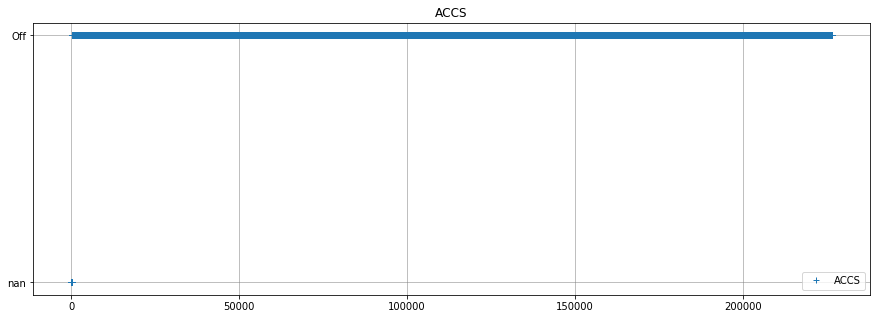

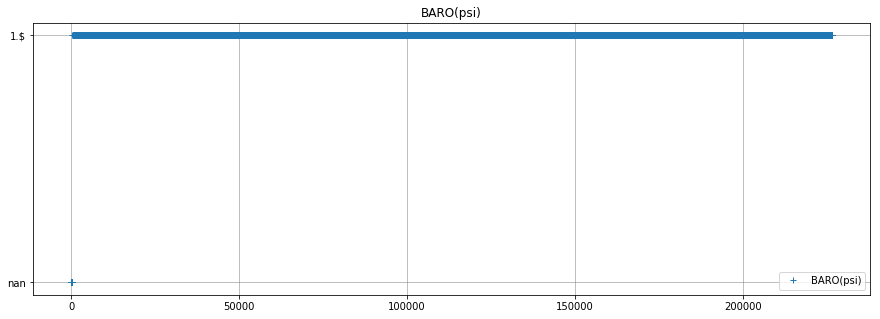

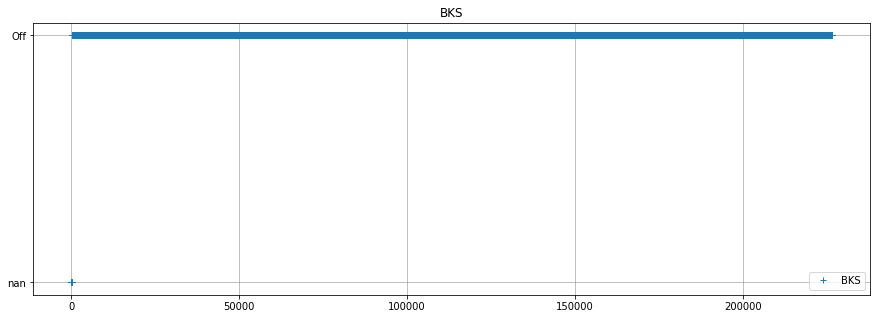

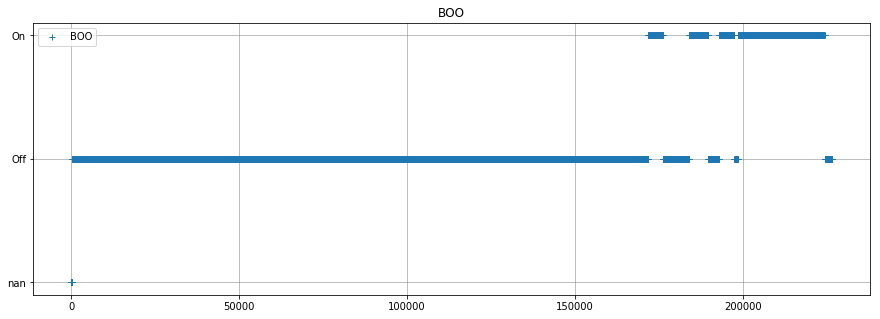

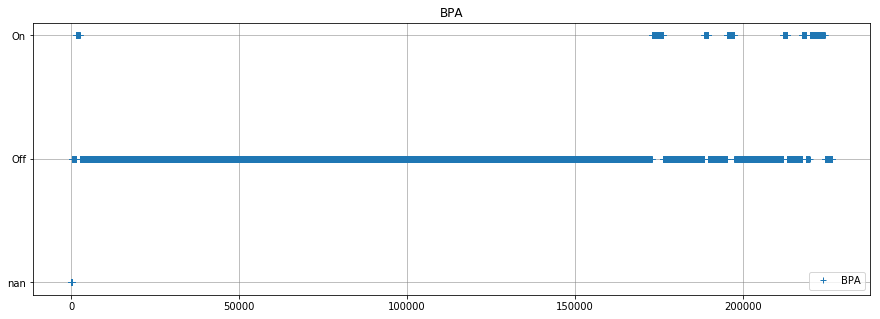

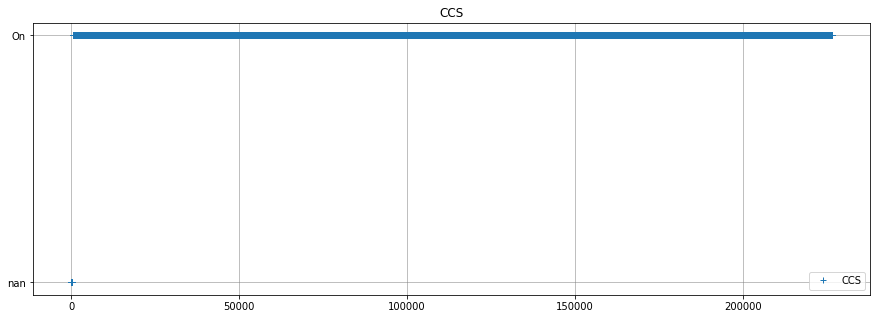

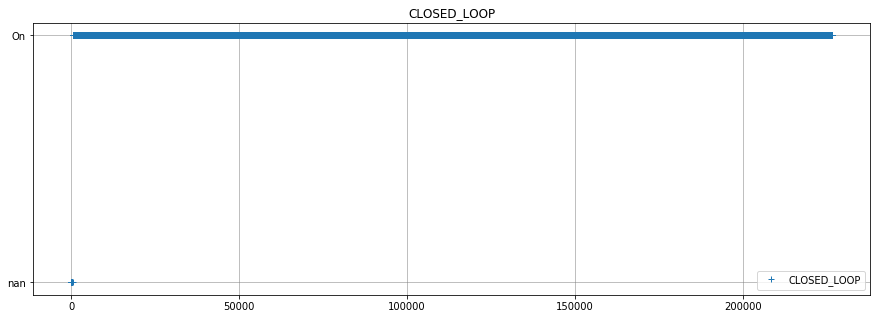

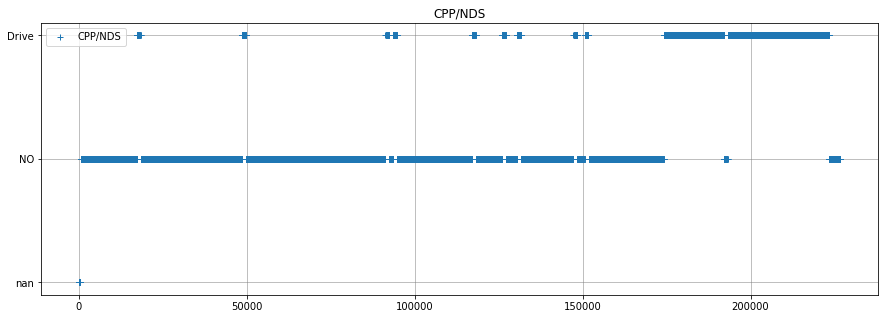

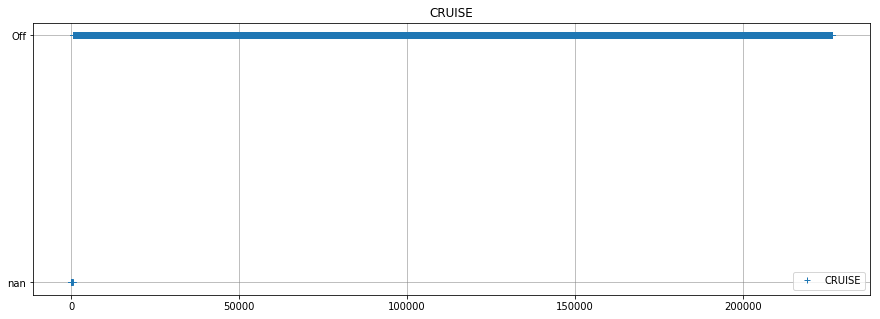

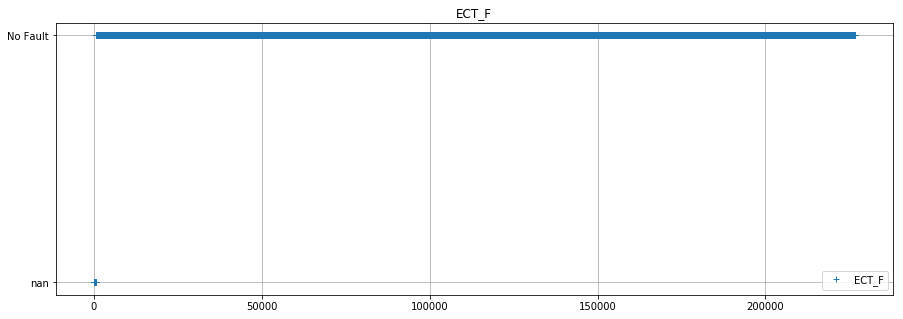

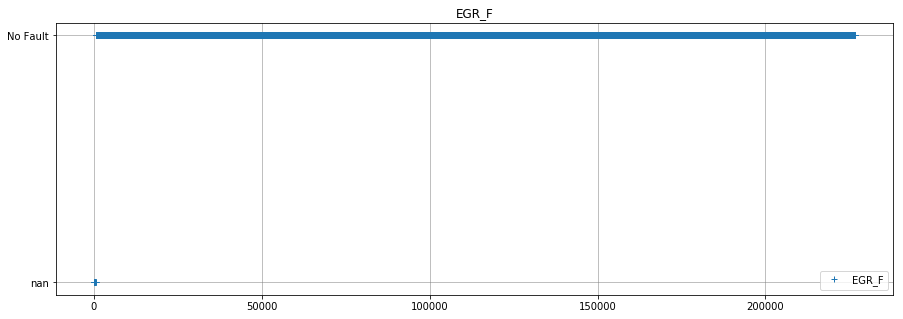

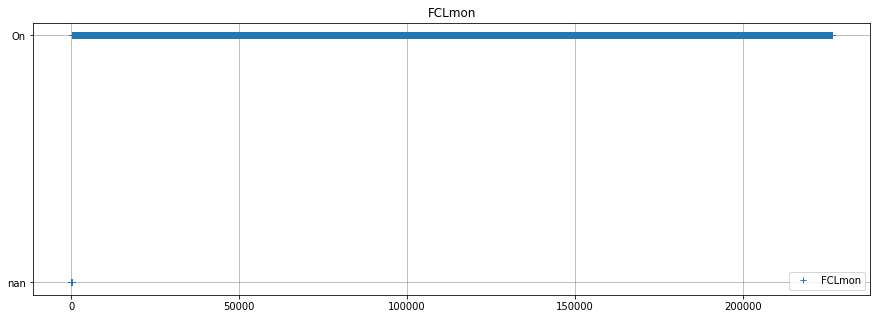

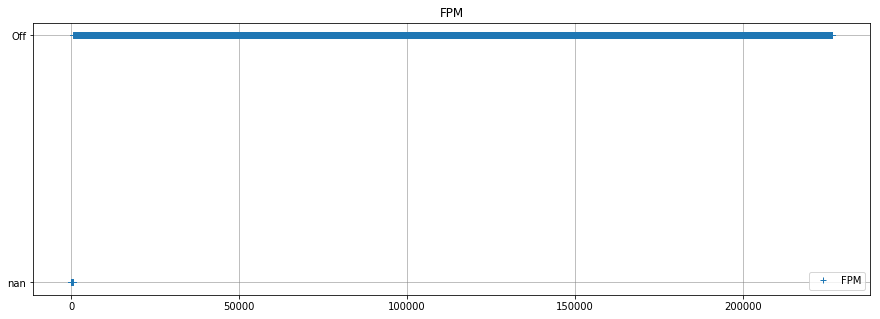

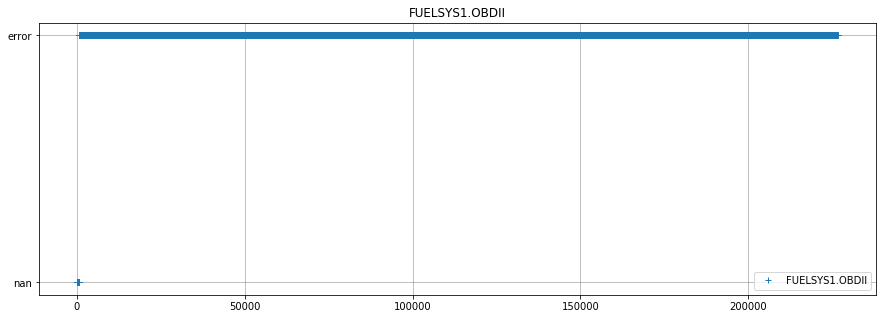

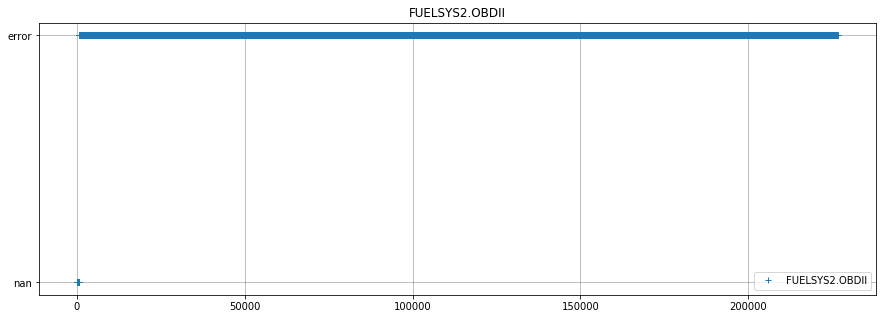

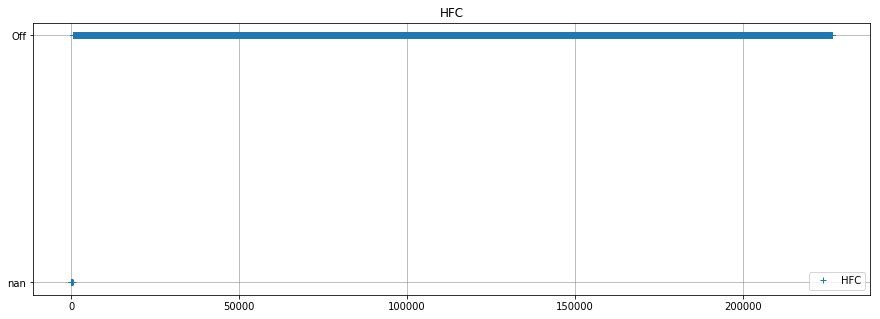

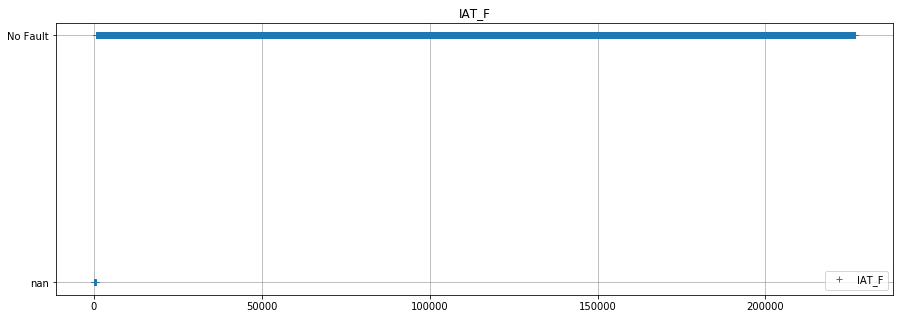

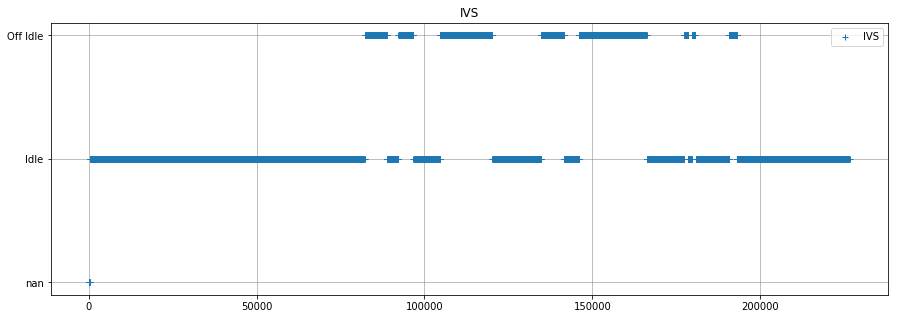

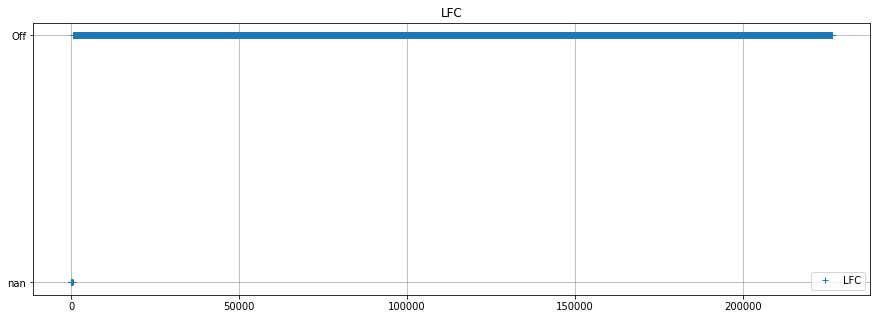

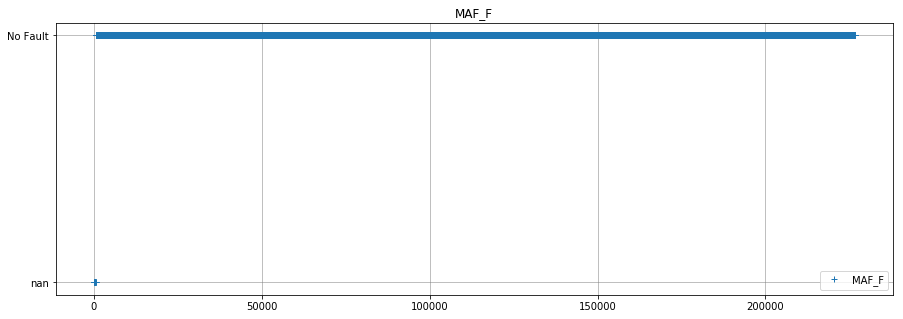

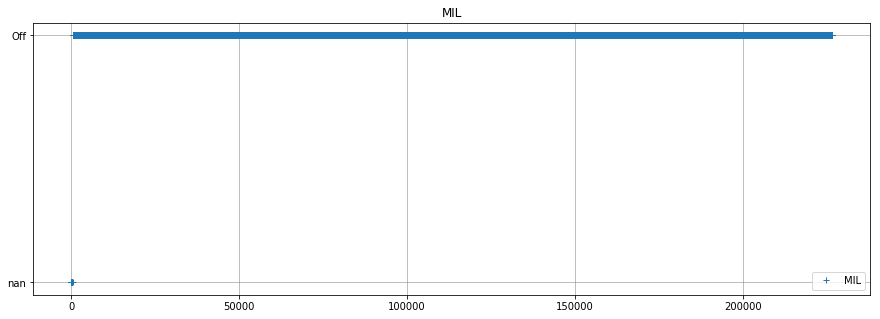

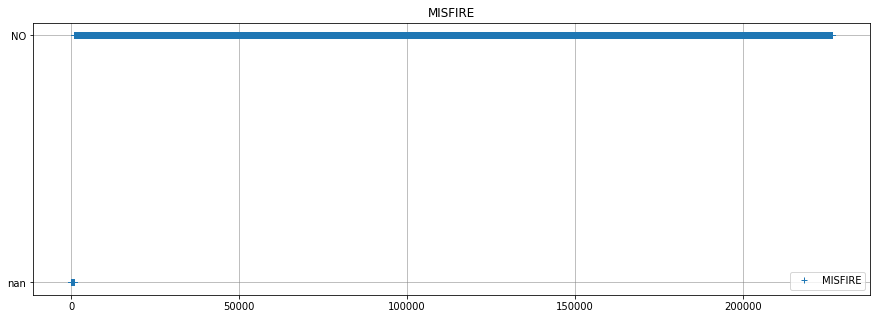

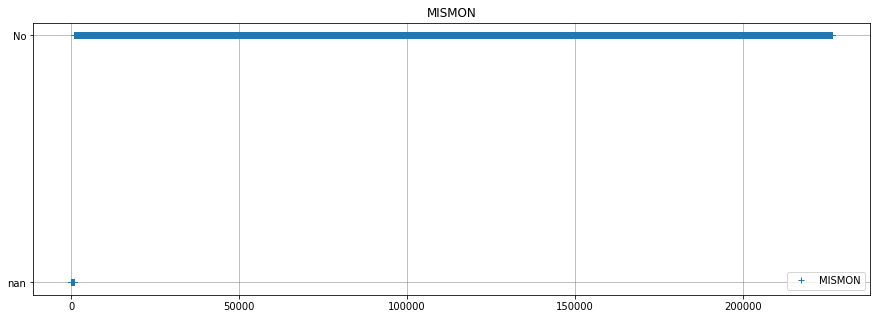

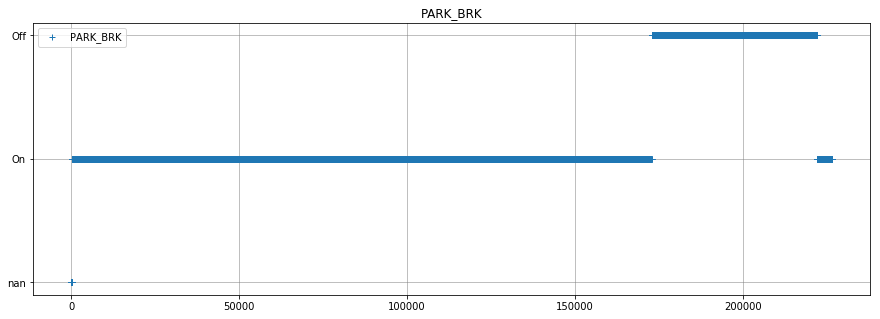

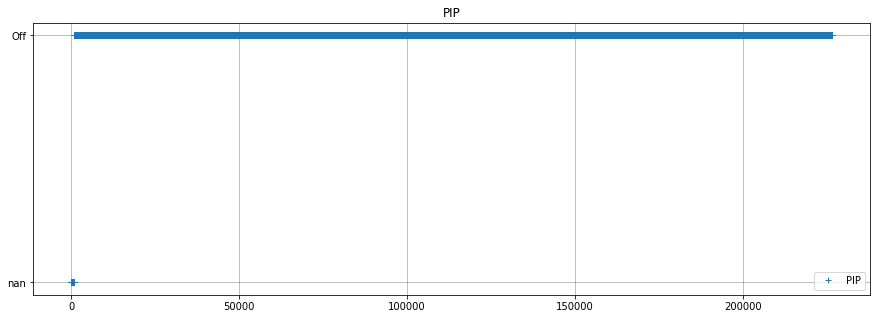

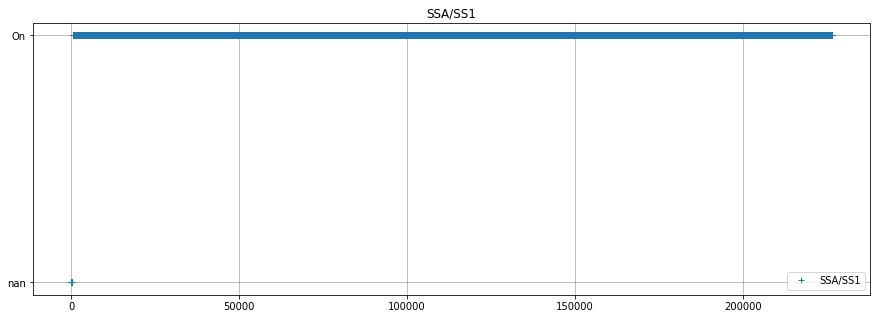

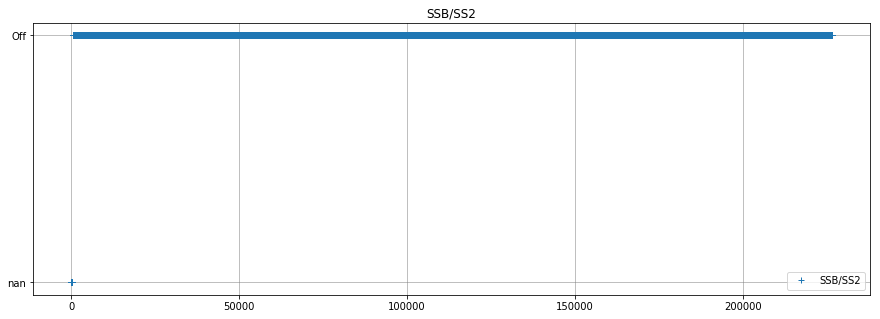

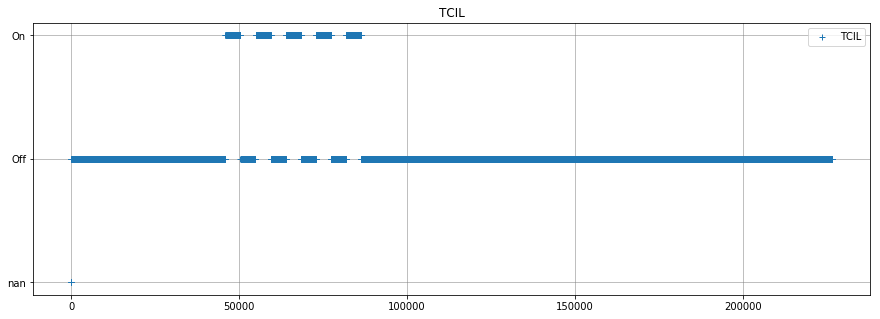

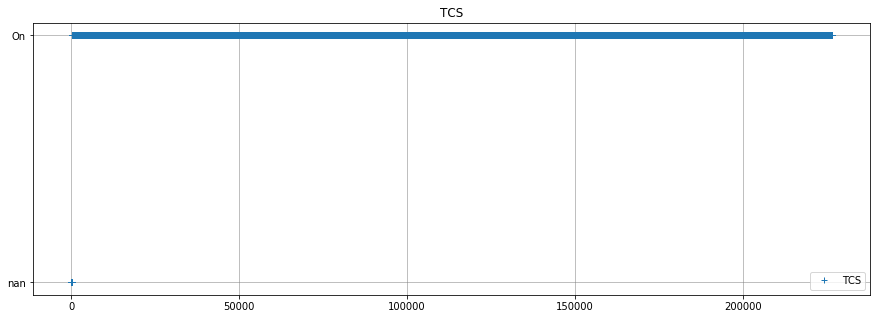

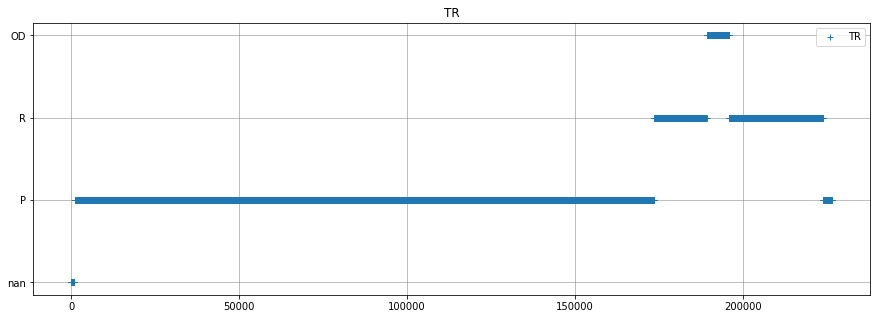

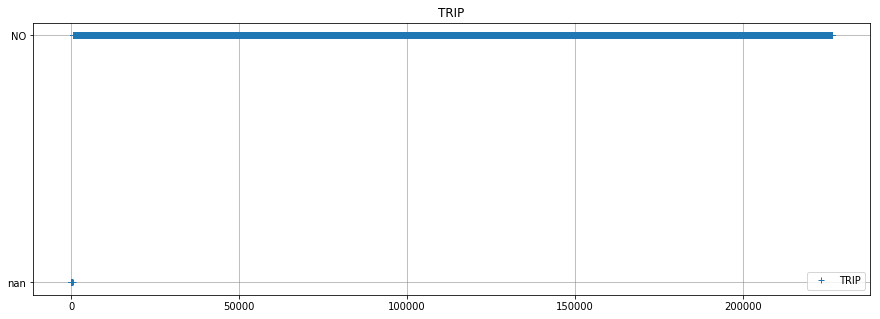

In [234]:
attr_df=pd.DataFrame()
for l in list(import_df.select_dtypes(include=['object']).columns):
    i=1
    yticks=import_df[l].unique()
    attr_df[l] = import_df[l].copy()
    attr_df[l].fillna(0,inplace=True)
    for v in attr_df[l].unique():
        attr_df[l].replace(v,i,inplace=True)
        i+=1

    fig, ax1 = plt.subplots(nrows=1,figsize=(15,5))
    ax1.set_yticks(list(range(1,len(attr_df[l].unique())+1)))
    fig.set_facecolor('white')
    plt.title(l)
    ax1.set_yticklabels(yticks)
    ax1.plot(attr_df[l],'+',label=l)
    ax1.legend(loc='best')
    ax1.grid(color='grey', linestyle='solid', linewidth=1,alpha=.5)
    plt.show()